### Data Loading & Details

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as s
import io
import warnings
import datetime as dt

from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore', category=UserWarning)

pd.set_option('display.max_columns', 50)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ola_driver_scaler.csv to ola_driver_scaler.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['ola_driver_scaler.csv']))

In [ ]:
data.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
data.shape

(19104, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


Following coumns need correction of their data type

- Dateofjoining
- LastWorkingDate



In [ ]:
print('Percentage of Null Rows:\n')
print(((data.isnull().sum()/len(data))*100).sort_values(ascending=False))
print('\n \nTotal Number of Duplicated Rows:')
print(data.duplicated().sum())

Percentage of Null Rows:

LastWorkingDate         91.541039
Age                      0.319305
Gender                   0.272194
Unnamed: 0               0.000000
MMM-YY                   0.000000
Driver_ID                0.000000
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

 
Total Number of Duplicated Rows:
0


High no. of Null values for

- LastWorkingDate
- Age
- Gender

There are no duplicate rows

### Data Preparation

In [ ]:
df = data.copy()
df.head(2)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2


In [ ]:
df = df.drop(['MMM-YY','Unnamed: 0'], axis=1)

df = df.rename(columns={'Education_Level': 'EducationLevel',
                        'Driver_ID': 'DriverID',
                        'Dateofjoining': 'JoiningDate',
                        'Joining Designation': 'JD',
                        'Total Business Value':'TBV',
                        'Quarterly Rating':'QRating'
                        })

cats = [col for col in df.columns if df[col].dtype == 'object']
print("Categorical Columns Before Correction: ",cats)


df['City'] = df['City'].str.replace('C', '').astype(int)
df['JoiningDate'] = pd.to_datetime(df['JoiningDate'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])


cats = [col for col in df.columns if df[col].dtype == 'object']
print("Categorical Columns After Correction: ",cats)

Categorical Columns Before Correction:  ['City', 'JoiningDate', 'LastWorkingDate']
Categorical Columns After Correction:  []


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DriverID         19104 non-null  int64         
 1   Age              19043 non-null  float64       
 2   Gender           19052 non-null  float64       
 3   City             19104 non-null  int64         
 4   EducationLevel   19104 non-null  int64         
 5   Income           19104 non-null  int64         
 6   JoiningDate      19104 non-null  datetime64[ns]
 7   LastWorkingDate  1616 non-null   datetime64[ns]
 8   JD               19104 non-null  int64         
 9   Grade            19104 non-null  int64         
 10  TBV              19104 non-null  int64         
 11  QRating          19104 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(8)
memory usage: 1.7 MB


**Making a Non-Null DataFrame Using KNN Imputations**

In [ ]:
# KNN Imputer works only with Numerical Datatypes, hence using them only

nums = df.select_dtypes(include=['int64', 'float64']).columns
datetime_cols = df.select_dtypes(include=['datetime64']).columns


df_numerical = df[nums]
df_datetime = df[datetime_cols]


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', KNNImputer(n_neighbors=5))
])

df_numerical_imputed = pipeline.fit_transform(df_numerical)


df_imputed = pd.concat([pd.DataFrame(df_numerical_imputed, columns=nums), df_datetime], axis=1)

print(df_imputed.head(3))
print()
print(df_imputed.isna().sum())

NameError: name 'df' is not defined

**Making a Grouped DataFrame Based On Driver ID**

In [ ]:
d = df.groupby('DriverID').agg({
    'Age': 'mean',
    'Gender': 'last',
    'City': 'last',
    'EducationLevel':'last',
    'Income':'mean',
    'JoiningDate':'last',
    'LastWorkingDate': 'last',
    'JD': 'max',
    'Grade': 'median',
    'TBV': 'mean',
    'QRating': 'mean'
    })

'''names = {
    'Age_mode': 'Most Frequent Age',
    'Gender_mode': 'Most Frequent Gender',
    'City_mode': 'Most Frequent City',
    'Education_Level_mode': 'Most Frequent Education Level',
    'Dateofjoining_mode': 'Most Frequent Date of Joining',
    'Joining Designation_median': 'Median Joining Designation',
    'Grade_median': 'Median Grade',
    'Total Business Value_mean': 'Average Total Business Value',
    'Total Business Value_sum': 'Total Business Value',
    'Quarterly Rating_median': 'Median Quarterly Rating'
}'''

d = d.rename(columns=names)

d = d.reset_index()

d.head(5)

,DriverID,Age,Gender,City,EducationLevel,Income,JoiningDate,LastWorkingDate,JD,Grade,TBV,QRating
0,1,28.0,0.0,23,2,57387.0,2018-12-24,2019-03-11,1,1.0,571860.0,2.0
1,2,31.0,0.0,7,2,67016.0,2020-11-06,NaT,2,2.0,0.0,1.0
2,4,43.0,0.0,13,2,65603.0,2019-12-07,2020-04-27,2,2.0,70000.0,1.0
3,5,29.0,0.0,9,0,46368.0,2019-01-09,2019-03-07,1,1.0,40120.0,1.0
4,6,31.0,1.0,11,1,78728.0,2020-07-31,NaT,3,3.0,253000.0,1.6


In [ ]:
print(d['LastWorkingDate'].max(), d['LastWorkingDate'].min())

# Filling One Month More than the max Month for Employees Who Have Not Left
d['LastWorkingDate'] = d['LastWorkingDate'].fillna(pd.Timestamp('2021-01-31 00:00:00'))

d['TBV'] = d['TBV'].apply(np.floor)

print(d.info())

d.head(5)

2020-12-28 00:00:00 2018-12-31 00:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DriverID         2381 non-null   int64         
 1   Age              2381 non-null   float64       
 2   Gender           2381 non-null   float64       
 3   City             2381 non-null   int64         
 4   EducationLevel   2381 non-null   int64         
 5   Income           2381 non-null   float64       
 6   JoiningDate      2381 non-null   datetime64[ns]
 7   LastWorkingDate  2381 non-null   datetime64[ns]
 8   JD               2381 non-null   int64         
 9   Grade            2381 non-null   float64       
 10  TBV              2381 non-null   float64       
 11  QRating          2381 non-null   float64       
dtypes: datetime64[ns](2), float64(6), int64(4)
memory usage: 223.3 KB
None


,DriverID,Age,Gender,City,EducationLevel,Income,JoiningDate,LastWorkingDate,JD,Grade,TBV,QRating
0,1,28.0,0.0,23,2,57387.0,2018-12-24,2019-03-11,1,1.0,571860.0,2.0
1,2,31.0,0.0,7,2,67016.0,2020-11-06,2021-01-31,2,2.0,0.0,1.0
2,4,43.0,0.0,13,2,65603.0,2019-12-07,2020-04-27,2,2.0,70000.0,1.0
3,5,29.0,0.0,9,0,46368.0,2019-01-09,2019-03-07,1,1.0,40120.0,1.0
4,6,31.0,1.0,11,1,78728.0,2020-07-31,2021-01-31,3,3.0,253000.0,1.6


**Feature Engineering & Creation of DataFrames for Analysis**

In [ ]:
d['MonthStayed'] = ((d['LastWorkingDate'] - d['JoiningDate']).dt.days) / 30.42

d['MonthStayed'] = d['MonthStayed'].round()

d['Staying'] = (d['LastWorkingDate'] == pd.Timestamp('2021-01-31')) * 1

print(d['Staying'].value_counts())

d['JoiningYear'] = d['JoiningDate'].dt.year

d['LastWorkingYear'] = d['LastWorkingDate'].dt.year

d.head(3)

Staying
0    1616
1     765
Name: count, dtype: int64


,DriverID,Age,Gender,City,EducationLevel,Income,JoiningDate,LastWorkingDate,JD,Grade,TBV,QRating,MonthStayed,Staying,JoiningYear,LastWorkingYear
0,1,28.0,0.0,23,2,57387.0,2018-12-24,2019-03-11,1,1.0,571860.0,2.0,3.0,0,2018,2019
1,2,31.0,0.0,7,2,67016.0,2020-11-06,2021-01-31,2,2.0,0.0,1.0,3.0,1,2020,2021
2,4,43.0,0.0,13,2,65603.0,2019-12-07,2020-04-27,2,2.0,70000.0,1.0,5.0,0,2019,2020


In [ ]:
ds = d.copy()

ds['LeavingMonth'] = ds['LastWorkingDate'].dt.month
ds['LeavingQuarter'] = ds['LastWorkingDate'].dt.quarter
ds['JoiningMonth'] = ds['JoiningDate'].dt.month
ds['JoiningQuarter'] = ds['JoiningDate'].dt.quarter

ds['Status'] = ds['Staying'].map({1: 'Is Staying', 0: 'Has Left'})
ds['Gender'] = ds['Gender'].map({1: 'Female', 0: 'Male'})
ds['EducationLevel'] = ds['EducationLevel'].map({0: '10+', 1: '12+', 2: 'Graduate'})

ds = ds.drop(['Staying','JoiningDate','LastWorkingDate'], axis=1)

ds.head(5)

,DriverID,Age,Gender,City,EducationLevel,Income,JD,Grade,TBV,QRating,MonthStayed,JoiningYear,LastWorkingYear,LeavingMonth,LeavingQuarter,JoiningMonth,JoiningQuarter,Status
0,1,28.0,Male,23,Graduate,57387.0,1,1.0,571860.0,2.0,3.0,2018,2019,3,1,12,4,Has Left
1,2,31.0,Male,7,Graduate,67016.0,2,2.0,0.0,1.0,3.0,2020,2021,1,1,11,4,Is Staying
2,4,43.0,Male,13,Graduate,65603.0,2,2.0,70000.0,1.0,5.0,2019,2020,4,2,12,4,Has Left
3,5,29.0,Male,9,10+,46368.0,1,1.0,40120.0,1.0,2.0,2019,2019,3,1,1,1,Has Left
4,6,31.0,Female,11,12+,78728.0,3,3.0,253000.0,1.6,6.0,2020,2021,1,1,7,3,Is Staying


In [ ]:
dg = df.groupby('DriverID').agg(Gender = ('Gender','last'),
                                FirstQR = ('QRating','first'),
                                LastQR = ('QRating','last'),
                                FirstInc = ('Income','first'),
                                LastInc = ('Income','last'),
                                LastWorkingDate = ('LastWorkingDate', 'last')
                                )

dg = dg.reset_index()

dg['LastWorkingDate'] = dg['LastWorkingDate'].fillna(pd.Timestamp('2021-01-31 00:00:00'))

dg['Target'] = (dg['LastWorkingDate'] == pd.Timestamp('2021-01-31')) * 1
dg['IncomeIncrease'] = (dg['LastInc'] > dg['FirstInc']).astype(int)
dg['RatingIncrease'] = (dg['LastQR'] > dg['FirstQR']).astype(int)

dg.head(5)

,DriverID,Gender,FirstQR,LastQR,FirstInc,LastInc,LastWorkingDate,Target,IncomeIncrease,RatingIncrease
0,1,0.0,2,2,57387,57387,2019-03-11,0,0,0
1,2,0.0,1,1,67016,67016,2021-01-31,1,0,0
2,4,0.0,1,1,65603,65603,2020-04-27,0,0,0
3,5,0.0,1,1,46368,46368,2019-03-07,0,0,0
4,6,1.0,1,2,78728,78728,2021-01-31,1,0,1


### Univariate & Bivariate Analysis






**Univariate Analysis**

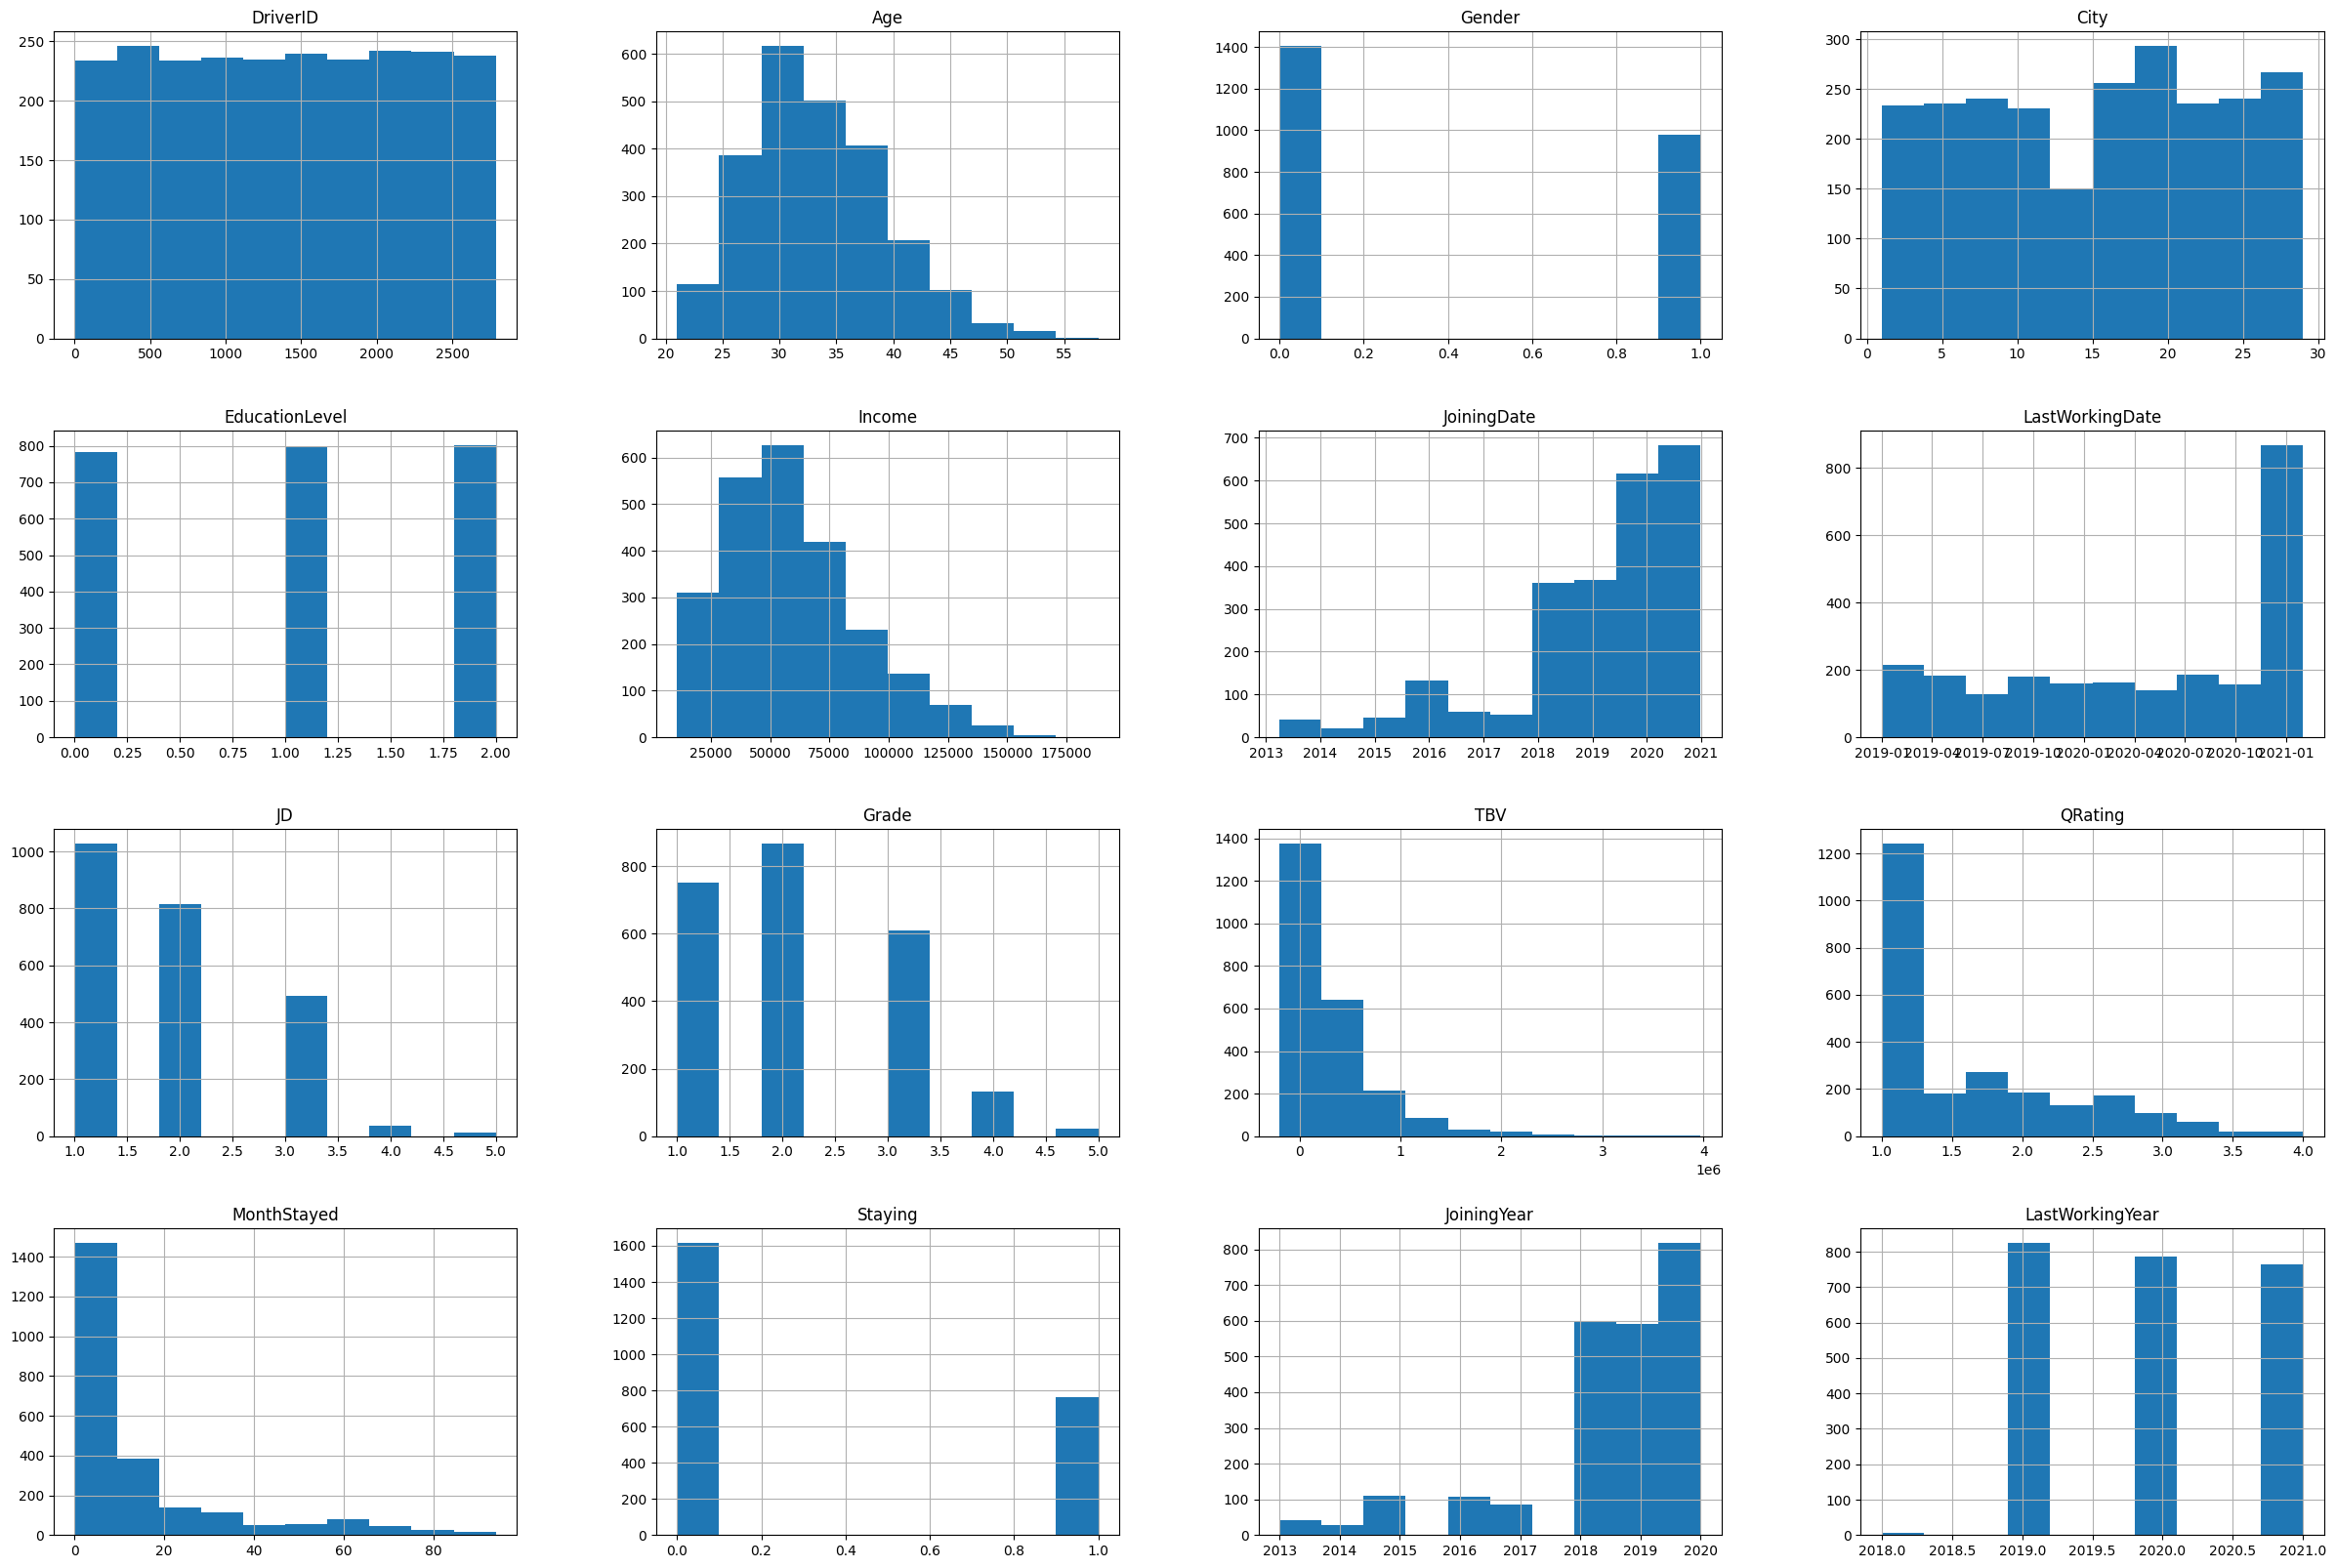

In [ ]:
d.hist(figsize = (30,20))
plt.show()

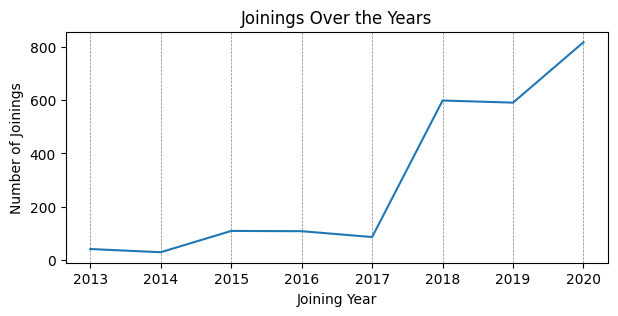

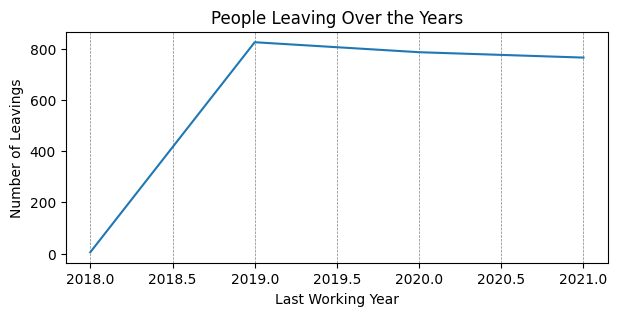

In [ ]:
year_counts = ds['JoiningYear'].value_counts().sort_index()

plt.figure(figsize=(7, 3))
sns.lineplot(x=year_counts.index, y=year_counts.values)

plt.xlabel('Joining Year')
plt.ylabel('Number of Joinings')
plt.title('Joinings Over the Years')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both', axis='x')
plt.xticks(rotation=0)
plt.show()

#_______________________________________________________________________________________________

year_counts = ds['LastWorkingYear'].value_counts().sort_index()

plt.figure(figsize=(7, 3))
sns.lineplot(x=year_counts.index, y=year_counts.values)

plt.xlabel('Last Working Year')
plt.ylabel('Number of Leavings')
plt.title('People Leaving Over the Years')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both', axis='x')
plt.xticks(rotation=0)
plt.show()

**Insights:**

- The joinings have increased significantly after 2017 and has been continuosly increasing
- People have started leaving less after 2019.

**Recommendations:**

- Study the policy changes that have happened after 2019 that had prevented people from leaving the firm.
- The trend is increasing for people joining the firm. The firm's retention has been increasing and appropriate steps should be taken to scale up the system

In [ ]:
dg.head(2)

,DriverID,Gender,FirstQR,LastQR,FirstInc,LastInc,LastWorkingDate,Target,IncomeIncrease,RatingIncrease
0,1,0.0,2,2,57387,57387,2019-03-11,0,0,0
1,2,0.0,1,1,67016,67016,2021-01-31,1,0,0


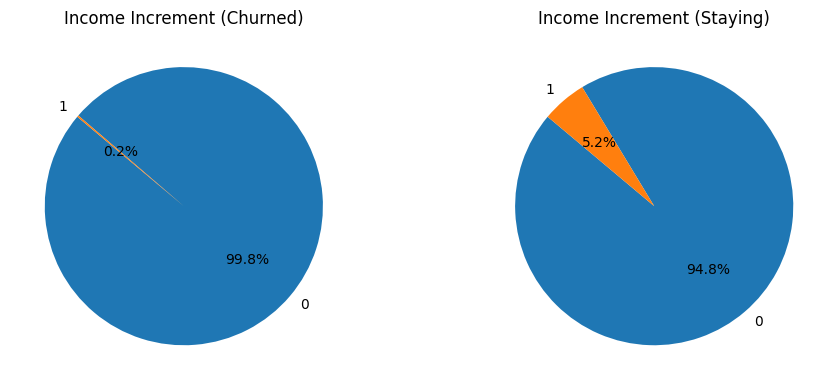

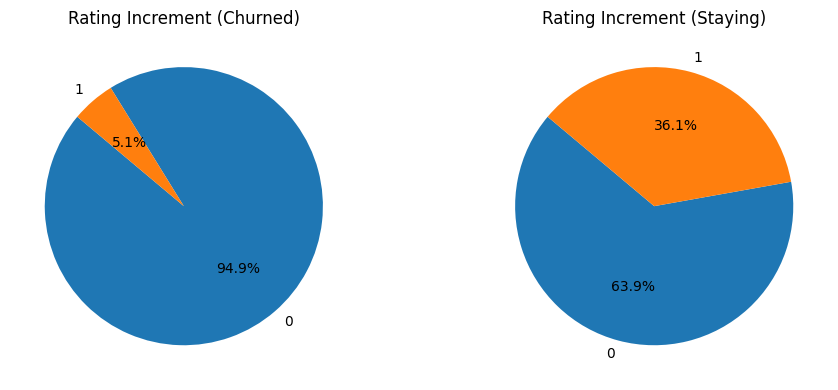

In [ ]:
staying = dg['IncomeIncrease'][dg['Target']==1].value_counts()
leaving = dg['IncomeIncrease'][dg['Target']==0].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.pie(leaving, labels=leaving.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Income Increment (Churned)')

ax2.pie(staying, labels=staying.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Income Increment (Staying)')

plt.tight_layout()

plt.show()

staying = dg['RatingIncrease'][dg['Target']==1].value_counts()
leaving = dg['RatingIncrease'][dg['Target']==0].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.pie(leaving, labels=leaving.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Rating Increment (Churned)')

ax2.pie(staying, labels=staying.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Rating Increment (Staying)')

plt.tight_layout()

plt.show()

**Insights**:
- The drivers that have left the company usually had lower percentage of increment in Quarterly Rating
- The drivers that have left the company usually had lower percentage of increment in their Incomes
- The percentage difference in Quarterly Rating is more pronounced than Income increase for drivers who have left v/s who are staying

**Recommendations**:
- The drivers who have stayed have reported a higher percentage of personnels who have gotten their income or ratings increased. This can be used as a tool to retain drivers. Study and implement ways that help them increase their ratings and their income.



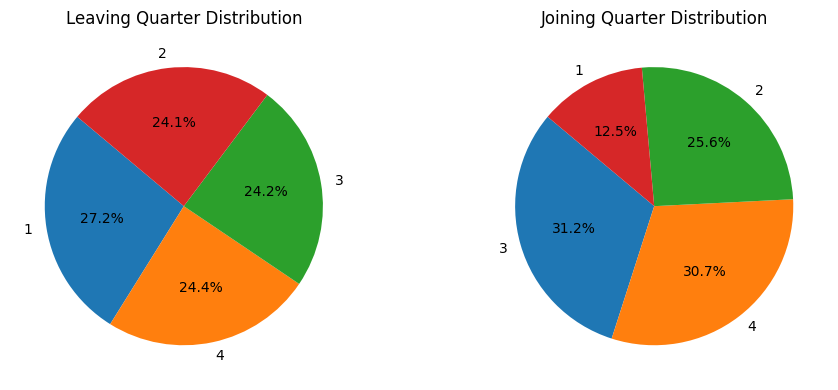

In [ ]:
leaving = ds['LeavingQuarter'][ds['Status']=='Has Left'].value_counts()
joining = ds['JoiningQuarter'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.pie(leaving, labels=leaving.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Leaving Quarter Distribution')

ax2.pie(joining, labels=joining.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Joining Quarter Distribution')

plt.tight_layout()

plt.show()

**Insights**:
- Nearly all of the people who left, have left equally in all quarters
- People mostly join the company in the third and fourth quarter

**Recommendations**:
- While the leavind data shows no particular trend, it is important to study the internal and external factors as to why people are joining the company in the 3rd and 4th quarter.
- If the reasons are external, additional incentives should be given in these quarters to make more people join the company.

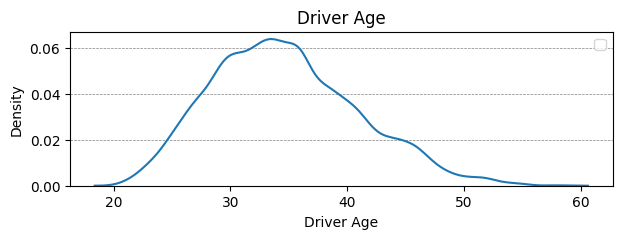

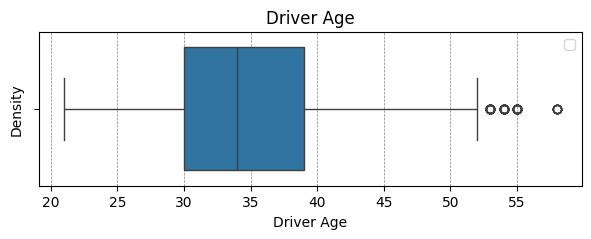

----------------------------------------------------------------------------------------------------


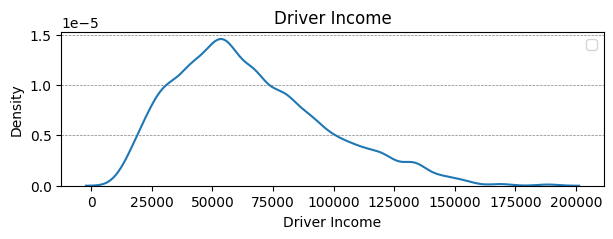

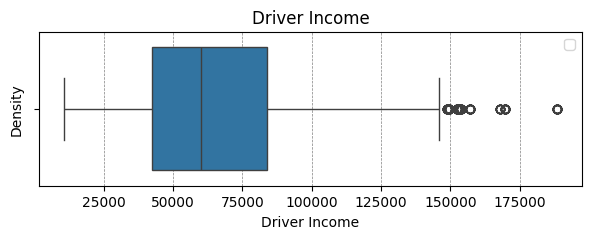

----------------------------------------------------------------------------------------------------


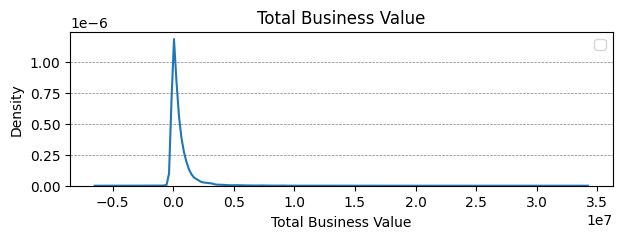

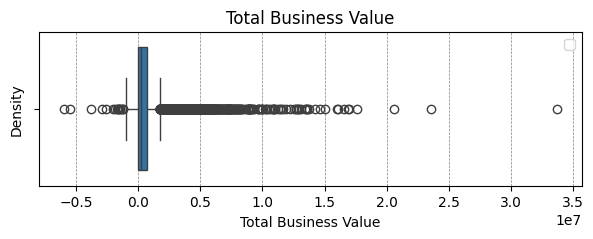

----------------------------------------------------------------------------------------------------


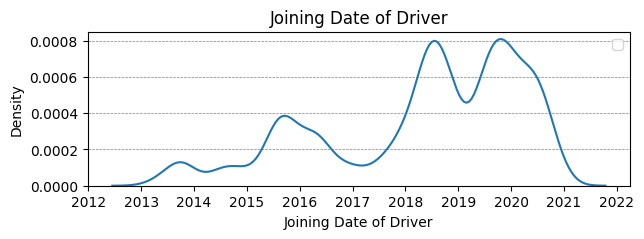

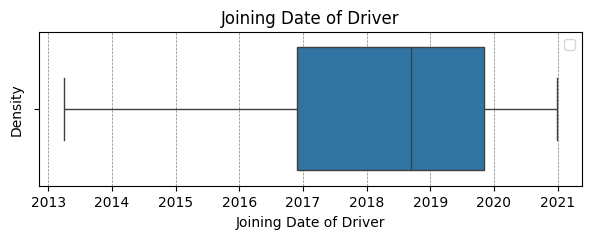

----------------------------------------------------------------------------------------------------


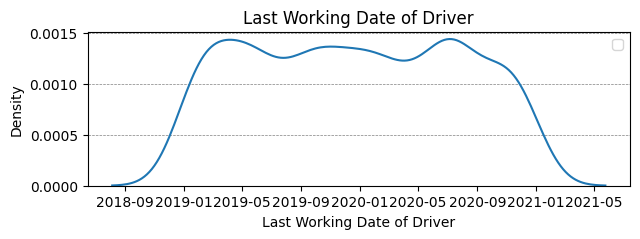

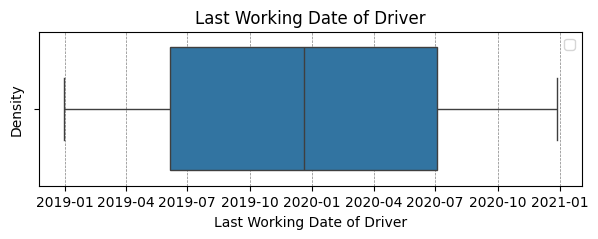

----------------------------------------------------------------------------------------------------


In [ ]:
def univariate(d, column_name='Age', title='Driver Age'):

  plt.figure(figsize=(7, 2))
  sns.kdeplot(df[column_name])
  plt.title(title)
  plt.xlabel(title)
  plt.ylabel('Density')
  plt.legend()
  plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both', axis='y')
  plt.xticks(rotation=0)

  plt.figure(figsize=(7, 2))
  sns.boxplot(x = df[column_name])
  plt.title(title)
  plt.xlabel(title)
  plt.ylabel('Density')
  plt.legend()
  plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both', axis='x')
  plt.xticks(rotation=0)
  plt.show()

  print('-'*100)


# Uses --------------------------------------------------------------------------------------------------------

univariate(ds, 'Age', 'Driver Age')

univariate(ds, 'Income', 'Driver Income')

univariate(ds, 'TBV', 'Total Business Value')

univariate(ds, 'JoiningDate', 'Joining Date of Driver')

univariate(ds, 'LastWorkingDate', 'Last Working Date of Driver')

**Insights:**
From the KDE Plots and Boxplots, following columns seem to be imbalanced and skewed because of the outliers:

1. Joining Date of Driver
2. Total Business Value
3. Last Working Date

Out of these, Total Business Value has the highest number of outliers which needs to be taken care of


**Outlier Removal (IQR Method)**

In [ ]:
def delete_outlier(df, c):

    print(f"Deleting Outliers from DataFrame's column {c}")
    print("Before Outlier Deletion:", df.shape)

    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    l = Q1 - 1.5 * IQR
    u = Q3 + 1.5 * IQR
    results = df[(df[c] >= l) & (df[c] <= u)]

    print("After Outlier Deletion:", results.shape)
    print()

    return results

#___________________________________________________________________________________________________________________________

ds = delete_outlier(ds, 'TBV')
d = delete_outlier(d, 'TBV')

Deleting Outliers from DataFrame's column TBV
Before Outlier Deletion: (2381, 18)
After Outlier Deletion: (2233, 18)

Deleting Outliers from DataFrame's column TBV
Before Outlier Deletion: (2381, 16)
After Outlier Deletion: (2233, 16)



**Note:** **Deleting Outliers from *ds* and *d* DataFrames as they would be used in further analysis as well as training ML models**

**Hypothesis Testing**

In [ ]:
from scipy.stats import ttest_ind

def do_ttest(d, col):
  fp = d[d['Status'] == 'Has Left'][col]
  co = d[d['Status'] == 'Is Staying'][col]

  t_stat, p_value = ttest_ind(fp, co)

  if p_value < 0.05:
    print(f"The means of {col} for Emplyees who are staying and Employees who have left are significantly different.")
  else:
    print(f"The means of {col} for Emplyees who are staying and Employees who have left are significantly different.")

#___________________________________________________________________________________________________________________________

from scipy.stats import chi2_contingency

def do_chisquare(col1, col2, alpha=0.05):
    contingency_table = pd.crosstab(col1, col2)
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    alpha = 0.05

    if p <= alpha:
        print("Reject the null hypothesis. There is A SIGNIFICANT ASSOCIATION between the columns")
    else:
        print("Fail to reject the null hypothesis. There is NO SIGNIFICANT ASSOCIATION between the columns")


**Bivariate Analysis**

In [ ]:
ds.head(2)

,DriverID,Age,Gender,City,EducationLevel,Income,JD,Grade,TBV,QRating,MonthStayed,JoiningYear,LastWorkingYear,LeavingMonth,LeavingQuarter,JoiningMonth,JoiningQuarter,Status
0,1,28.0,Male,23,Graduate,57387.0,1,1.0,571860.0,2.0,3.0,2018,2019,3,1,12,4,Has Left
1,2,31.0,Male,7,Graduate,67016.0,2,2.0,0.0,1.0,3.0,2020,2021,1,1,11,4,Is Staying


Status       Has Left  Is Staying
JoiningYear                      
2013               23           5
2014                7          10
2015               51          36
2016               63          27
2017               60          14
2018              519          50
2019              484          82
2020              377         425


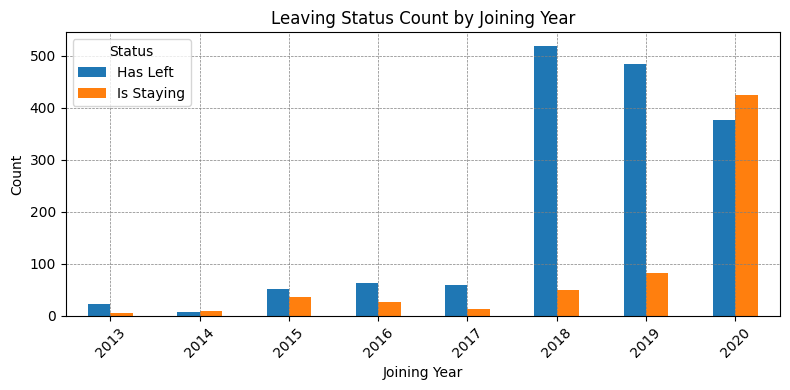

Status  JoiningYear  Has Left  Is Staying  LeavingToRetainedRatio
5              2018       519          50               10.380000
6              2019       484          82                5.902439
0              2013        23           5                4.600000
4              2017        60          14                4.285714
3              2016        63          27                2.333333
2              2015        51          36                1.416667
7              2020       377         425                0.887059
1              2014         7          10                0.700000


In [ ]:
status_counts =  ds.pivot_table(index='JoiningYear',columns='Status',aggfunc='size')

print(status_counts)

status_counts.plot(kind='bar', figsize=(8, 4))
plt.title('Leaving Status Count by Joining Year')
plt.xlabel('Joining Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='major')
plt.tight_layout()

plt.show()

status_counts = status_counts.reset_index()
status_counts['LeavingToRetainedRatio'] = status_counts['Has Left']/status_counts['Is Staying']

print(status_counts.sort_values('LeavingToRetainedRatio', ascending=False))

**Insights:**

- People who have joined in 2018 has the highest Left/Retained ratio.
- People joining between 2016-2018 had more tendency to stay with the company
- People who have joined in 2014 has the lowest Left/Retained ratio.

**Recommendations:**

- Study why people who are recently joining are leaving so early.
- Study what are the differences in benefits/incentives given to the older employees that is helping in their increased retention.
- Try to increase the incentives given to the recent joinees as well.
- Study of this increase in leaving ratio is coinciding with the coming of new players in the market

Status  Has Left  Is Staying
Grade                       
1.0          594         147
2.0          595         239
3.0          330         244
4.0           53          17
5.0           12           2


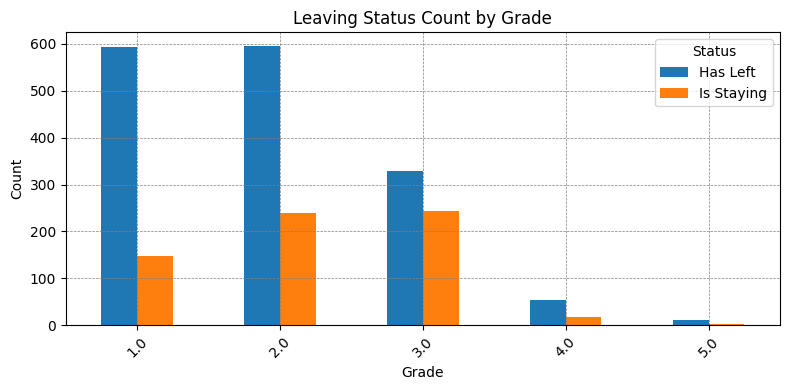

Status  Grade  Has Left  Is Staying  LeavingToRetainedRatio
4         5.0        12           2                6.000000
0         1.0       594         147                4.040816
3         4.0        53          17                3.117647
1         2.0       595         239                2.489540
2         3.0       330         244                1.352459


In [ ]:
status_counts =  ds.pivot_table(index='Grade',columns='Status',aggfunc='size')

print(status_counts)

status_counts.plot(kind='bar', figsize=(8, 4))
plt.title('Leaving Status Count by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='major')
plt.tight_layout()

plt.show()

status_counts = status_counts.reset_index()
status_counts['LeavingToRetainedRatio'] = status_counts['Has Left']/status_counts['Is Staying']

print(status_counts.sort_values('LeavingToRetainedRatio', ascending=False))

**Insights:**

- People with the lowest Grade are the ones who have the highest churn rate.
- People with higher Grade have lower churn rate.

**Recommendations:**

- The sweet spot for employees whose churn rate is the lowest is somewhere in the middle, i.e. 3-4. This info can be used in designing a point based hiring system.
- The causes should be studied as to why the people with lower grade are not so keen to stay with the company.

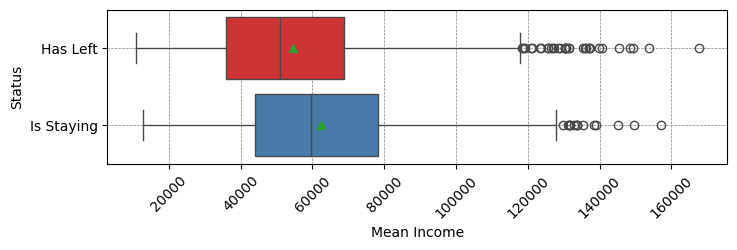

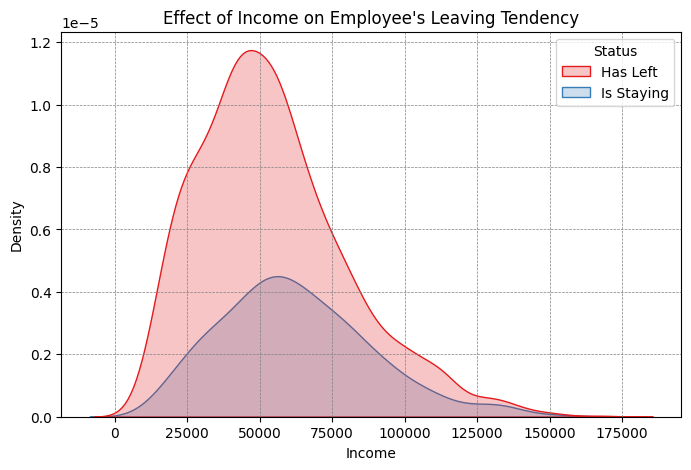

The means of Income for Emplyees who are staying and Employees who have left are significantly different.


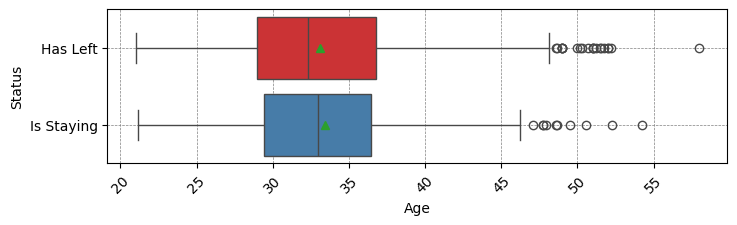

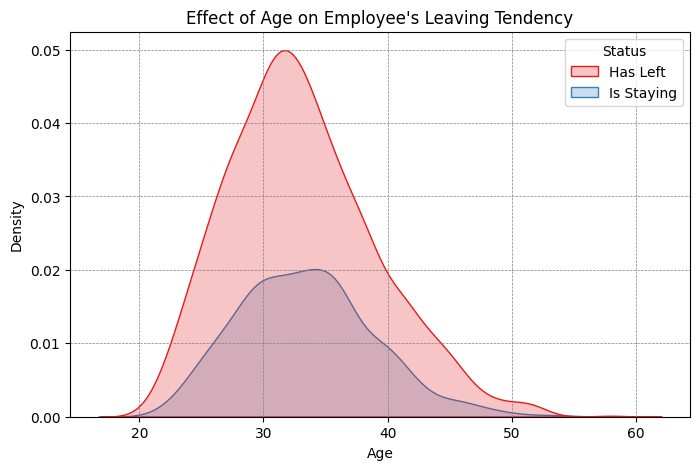

The means of Age for Emplyees who are staying and Employees who have left are significantly different.


In [ ]:
def plot_boxplot(x, y, title, xlabel, ylabel, hue=None, palette="Set1", x_rotation=45):
  plt.figure(figsize=(8, 2))
  sns.boxplot(x=x, y=y, hue=hue, showmeans=True, palette=palette)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.xticks(rotation=x_rotation)
  plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='major')
  plt.show()

#____________________________________________________________________________________________________________________________

def plot_kde(x, hue, palette="Set1", title=None, xlabel=None, fill=True, x_rotation=45):
  plt.figure(figsize=(8, 5))  # Adjust figure size as needed

  sns.kdeplot(x=x, hue=hue, legend="Loan Status", palette=palette, fill=fill)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel("Density")
  plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='major')
  plt.show()

#____________________________________________________________________________________________________________________________

plot_boxplot(ds['Income'], ds['Status'], hue=ds['Status'],
             xlabel="Mean Income", ylabel='Status', title = "")

plot_kde(ds['Income'], ds['Status'],
         xlabel="Income",
         title = "Effect of Income on Employee's Leaving Tendency")

do_ttest(ds, 'Income')

#____________________________________________________________________________________________________________________________

plot_boxplot(ds['Age'], ds['Status'], hue=ds['Status'],
             xlabel="Age", ylabel='Status', title = "")

plot_kde(ds['Age'], ds['Status'],
         xlabel="Age",
         title = "Effect of Age on Employee's Leaving Tendency")

do_ttest(ds, 'Age')

**Insights:**

There is a significant difference between these variables for employees that are staying v/s those who have left:
- Age: People who have stayed on average have higher age
- Mean Income: People who have stayed on average have higher mean income

**Recommendations:**

- People with higher age (probably more experience in their field) have managed to have a higher income in the given setup. While hiring new recruits, this information should be kept in mind.

------------------------------------------------------------------------------------------------------------------------------------------------------
Fail to reject the null hypothesis. There is NO SIGNIFICANT ASSOCIATION between the columns
------------------------------------------------------------------------------------------------------------------------------------------------------


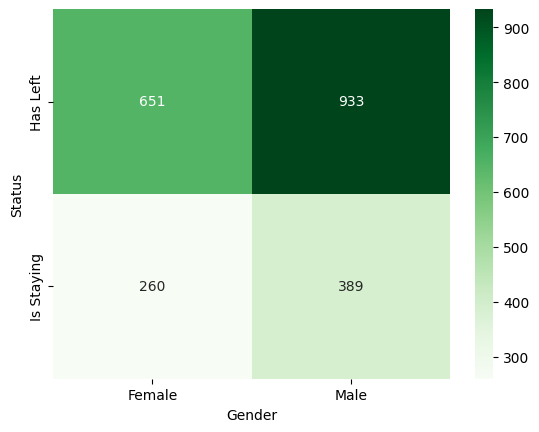

------------------------------------------------------------------------------------------------------------------------------------------------------


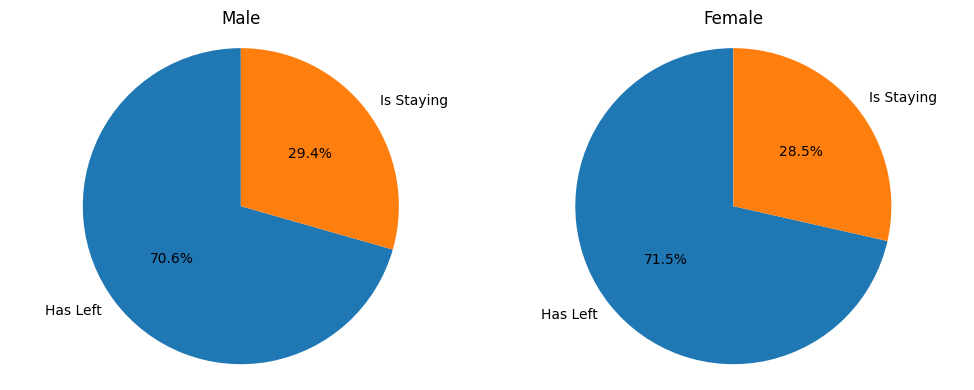

In [ ]:
print('-'*150)
contingency_table = pd.crosstab(ds['Status'], ds['Gender'])
do_chisquare(ds['Status'], ds['Gender'])

print('-'*150)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Greens')
plt.show()

print('-'*150)

verification_statuses = ['Male', 'Female']
colors = ["skyblue", "lightgreen"]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for i, status in enumerate(verification_statuses):
    df_filtered = ds[ds['Gender'] == status]
    status_counts = df_filtered['Status'].value_counts()
    labels = status_counts.index.to_numpy()
    sizes = status_counts.to_numpy()


    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False,
                startangle=90, pctdistance=0.55, rotatelabels=False)
    axes[i].set_title(f'{status}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

**Insights**:

- There seems to be no association between an employees tendency to leave the company based on gender

**Recommendation**:

- Gender is not a variable that needs to be considered while hiring new recruits. Both the genders are equally likely to stay/leave.

------------------------------------------------------------------------------------------------------------------------------------------------------
Fail to reject the null hypothesis. There is NO SIGNIFICANT ASSOCIATION between the columns
------------------------------------------------------------------------------------------------------------------------------------------------------


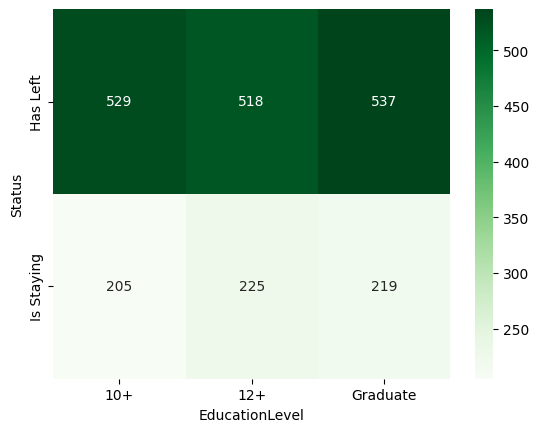

------------------------------------------------------------------------------------------------------------------------------------------------------


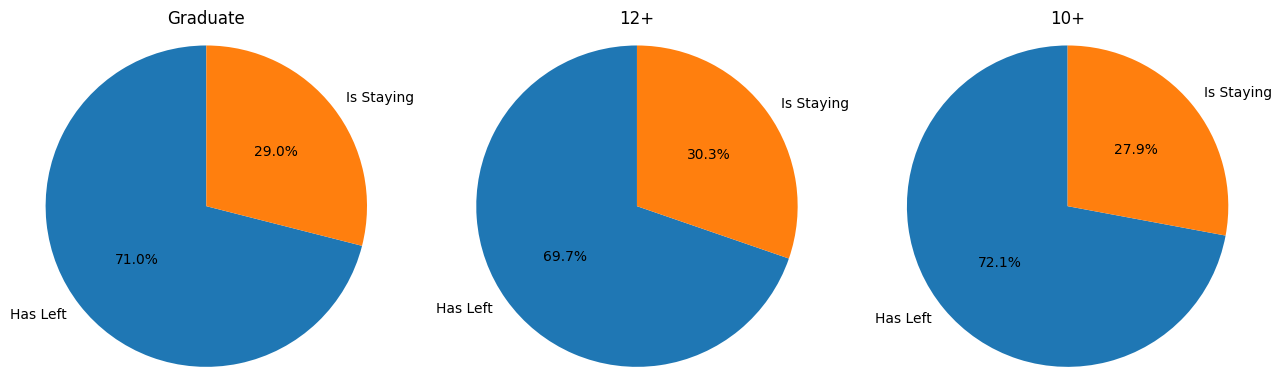

In [ ]:
print('-'*150)
contingency_table = pd.crosstab(ds['Status'], ds['EducationLevel'])
do_chisquare(ds['Status'], ds['EducationLevel'])

print('-'*150)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Greens')
plt.show()

print('-'*150)

values_in_columns = ['Graduate','12+','10+']
# colors = ["skyblue", "lightgreen"]

fig, axes = plt.subplots(1, 3, figsize=(13, 4))

for i, status in enumerate(values_in_columns):
    df_filtered = ds[ds['EducationLevel'] == status]
    status_counts = df_filtered['Status'].value_counts()
    labels = status_counts.index.to_numpy()
    sizes = status_counts.to_numpy()


    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False,
                startangle=90, pctdistance=0.55, rotatelabels=False)
    axes[i].set_title(f'{status}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

**Insights**:
- No significant association exists between the education level of the employee and his/her ability to churn

**Recommendations**:
- While hiring employees, education level can not be used as a metric to judge whether the employee will stay or leave.

Deleting Outliers from DataFrame's column MonthStayed
Before Outlier Deletion: (1584, 18)
After Outlier Deletion: (1396, 18)

Mean Months Stayed for Churned Employees: 6.73
Standard Deviation of Months Stayed for the Churned Employees: 5.29


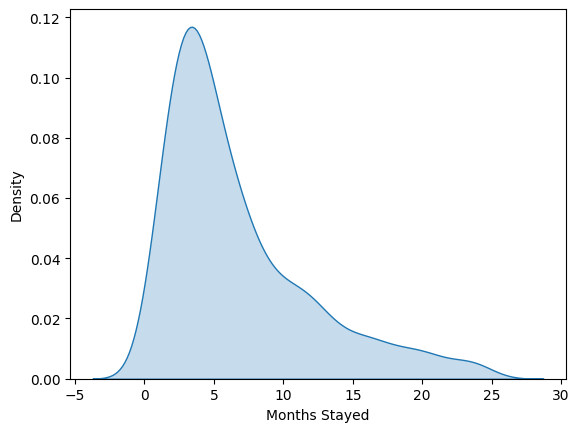

In [ ]:
gone = ds[ds['Status'] == 'Has Left']

gone = delete_outlier(gone, 'MonthStayed')


mean_stayed = gone['MonthStayed'].mean()
std_stayed = gone['MonthStayed'].std()


print(f"Mean Months Stayed for Churned Employees: {mean_stayed:.2f}")
print(f"Standard Deviation of Months Stayed for the Churned Employees: {std_stayed:.2f}")

sns.kdeplot(gone['MonthStayed'], fill=True)
plt.xlabel("Months Stayed")
plt.ylabel("Density")
plt.show()

**Insights**:

After removing outliers we hav efollowing insights:
- An employee who has churned usually stayed with the company for around half-year

**Recommendations:**
- A study should be made to understand why the retention time is so low for the churned employees, is it technicalities, difficulty in understanding the new system or something else.

------------------------------------------------------------------------------------------------------------------------------------------------------
Reject the null hypothesis. There is A SIGNIFICANT ASSOCIATION between the columns
------------------------------------------------------------------------------------------------------------------------------------------------------


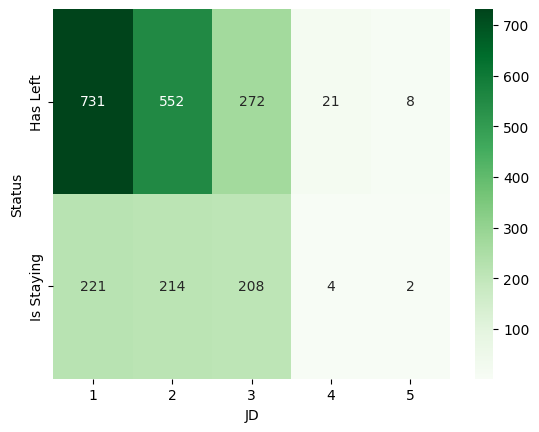

------------------------------------------------------------------------------------------------------------------------------------------------------


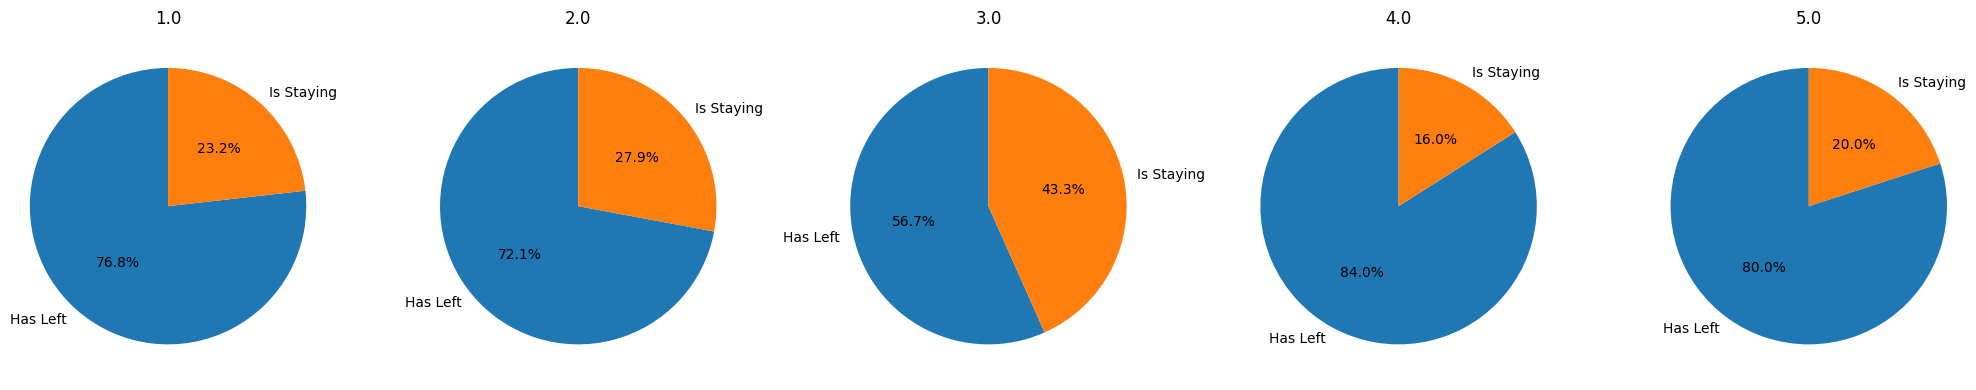

In [ ]:
print('-'*150)
contingency_table = pd.crosstab(ds['Status'], ds['JD'])
do_chisquare(ds['Status'], ds['JD'])

print('-'*150)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Greens')
plt.show()

print('-'*150)

values_in_columns = [1.0,2.0,3.0,4.0,5.0]
# colors = ["skyblue", "lightgreen"]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, status in enumerate(values_in_columns):
    df_filtered = ds[ds['JD'] == status]
    status_counts = df_filtered['Status'].value_counts()
    labels = status_counts.index.to_numpy()
    sizes = status_counts.to_numpy()


    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False,
                startangle=90, pctdistance=0.55, rotatelabels=False)
    axes[i].set_title(f'{status}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

**Insights**:
- People with Joining Designation as 1 at the extremes i.e. 1 and 5 are the most likely to leave
- People with Joining Designation as 3 are least likely to leave the company

**Recommendations**:
- People with Joining Designation as 3 should be considered better than 1 or 5 while recruiting

### Random Forest Classifier (Bagging)

**Making Test and Training Sets**

In [ ]:
from sklearn.model_selection import train_test_split

y = d['Staying']
x = d.drop(['Staying','JoiningDate','LastWorkingDate','DriverID','LastWorkingYear', 'MonthStayed'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=42)

**Synthetic Minority Over-sampling Technique**

In [ ]:
from imblearn.over_sampling import SMOTE

print("\nBefore SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=1)
x_train, y_train = smote.fit_resample(x_train, y_train)

print("\nAfter SMOTE:")
print(y_train.value_counts())


Before SMOTE:
Staying
0    1068
1     428
Name: count, dtype: int64

After SMOTE:
Staying
0    1068
1    1068
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


**Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
stasca = StandardScaler()

x_train = stasca.fit_transform(x_train)
x_test = stasca.transform(x_test)

**Searching For Best Random Forest Classifier**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=params, n_iter=30, cv=2, verbose=1, random_state=42)


random_search.fit(x_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score achieved: ", random_search.best_score_)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best cross-validation score achieved:  0.7949438202247191


**Insights:**
- From the given limited set of parameters (for limited computational power), following are the best parameters found: 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30.

**Recommendations:**
- A model should be trained and used using the above metrics for best results
- If more computational power or time is available, more parameters should be tested in the randomised search for parameters, because the accuracy of around 80% is not that high

**Training The Best Random Forest Classifier**

The OOB score for original data is: 0.8488
{'0': {'precision': 0.8423153692614771, 'recall': 0.8178294573643411, 'f1-score': 0.8298918387413963, 'support': 516.0}, '1': {'precision': 0.6016949152542372, 'recall': 0.6425339366515838, 'f1-score': 0.6214442013129103, 'support': 221.0}, 'accuracy': 0.7652645861601085, 'macro avg': {'precision': 0.7220051422578572, 'recall': 0.7301816970079624, 'f1-score': 0.7256680200271532, 'support': 737.0}, 'weighted avg': {'precision': 0.7701618816962125, 'recall': 0.7652645861601085, 'f1-score': 0.767385830774374, 'support': 737.0}}


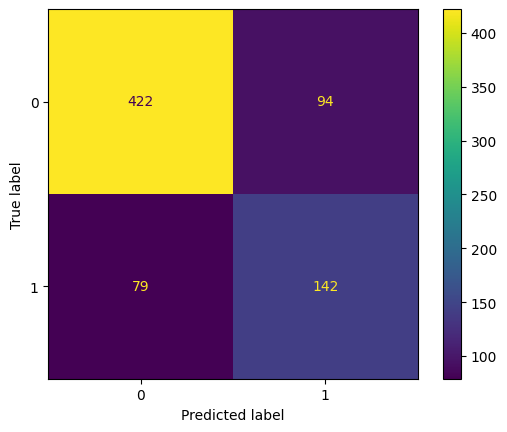

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier_best = RandomForestClassifier(n_estimators = 200,
                                            min_samples_split = 2,
                                            min_samples_leaf = 1,
                                            max_depth = 30,
                                            oob_score=True,
                                            random_state=42)

rf_classifier_best.fit(x_train, y_train)

oob_score_best = rf_classifier_best.oob_score_

print(f"The OOB score for original data is: {oob_score_best:.4f}")

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_classifier_best.predict(x_test)

class_report = classification_report(y_test, y_pred, output_dict=True)

print(class_report)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

**Insights:**
- The trained Random Forest model has a high Recall but low Precision

**Recomemndations:**
- The trained Random Forest model can be used where false negatives are very concerning, but is not recommended where incorrectly predicting false positives can be critical.

**Finding Feature Importances**

Feature Importances: [0.10567503 0.05312006 0.09057293 0.03184121 0.12277823 0.0236112
 0.09220793 0.14106558 0.14978951 0.18933832]


<Figure size 1000x600 with 0 Axes>

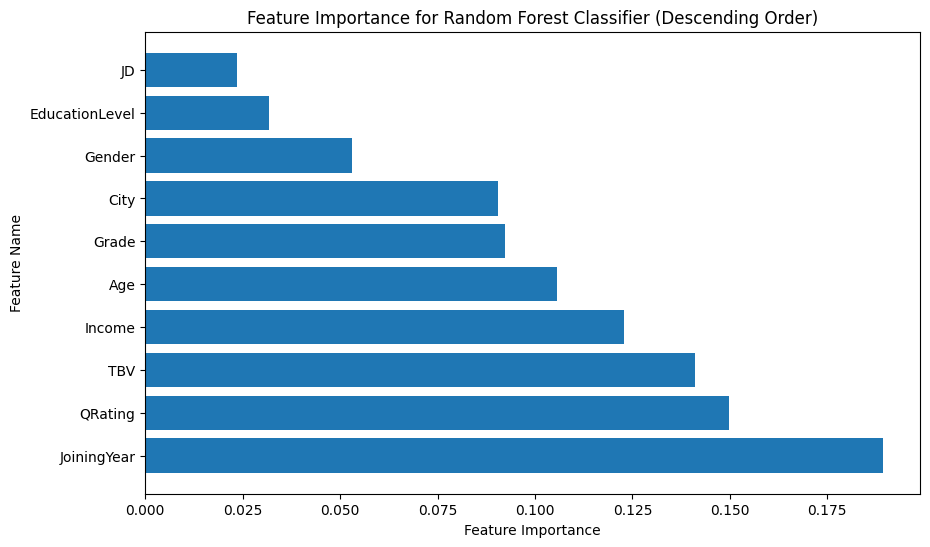

In [ ]:
feature_importances = rf_classifier_best.feature_importances_

print("Feature Importances:", feature_importances)

feature_names = x.columns

plt.figure(figsize=(10, 6))

i = np.argsort(feature_importances)[::-1]

sorted_feature_names = feature_names[i]

sorted_importances = feature_importances[i]


plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance for Random Forest Classifier (Descending Order)")
plt.show()


**Insights**:
- Joining Year and Quarterly Ratings are the biggest indicators of an employyee to churn.
- Job Designation and Education level do not have that big of an effect on the employee's churning ability

**Recommendations**:
- If the trained machine learning model is not available, the top 3 metrics to determine the employee's tendence to churn would be:

1. Joining Year
2. Quarterly Rating
3. Employee's Sum of Total Business Value



**ROC Curve & Precision-Recall Curve**

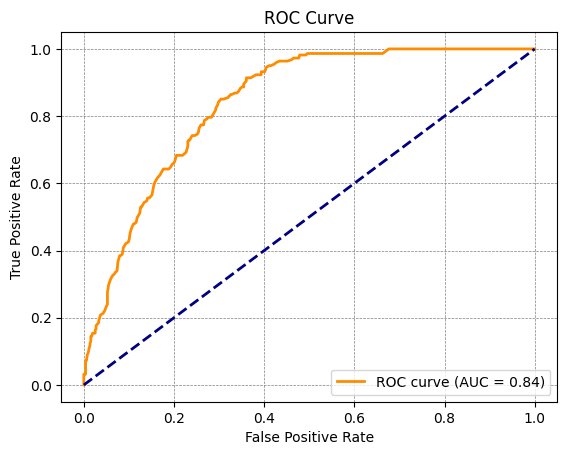

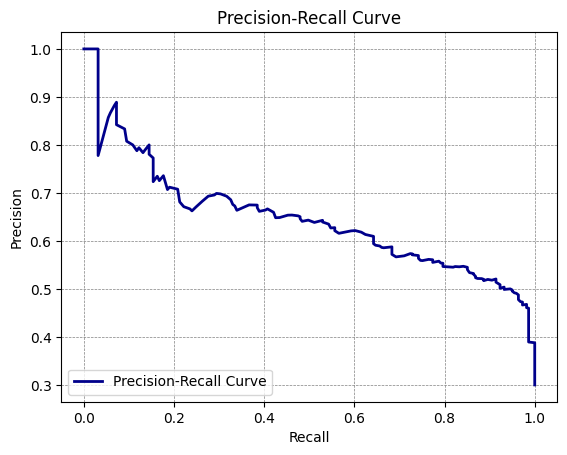

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = rf_classifier_best.predict_proba(x_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='major')
plt.show()

from sklearn.metrics import precision_recall_curve

p, r, threshold = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(r, p, color='darkblue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both')
plt.show()

### GBDT (Boosting)

**Making Training and Test Sets**

In [ ]:
from sklearn.model_selection import train_test_split

y = d['Staying']
x = d.drop(['Staying','JoiningDate','LastWorkingDate','DriverID','LastWorkingYear', 'MonthStayed'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=42)

**Synthetic Minority Over-sampling Technique**

In [ ]:
from imblearn.over_sampling import SMOTE

print("\nBefore SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=1)
x_train, y_train = smote.fit_resample(x_train, y_train)

print("\nAfter SMOTE:")
print(y_train.value_counts())


Before SMOTE:
Staying
0    1068
1     428
Name: count, dtype: int64

After SMOTE:
Staying
0    1068
1    1068
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


**Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
stasca = StandardScaler()

x_train = stasca.fit_transform(x_train)
x_test = stasca.transform(x_test)

**Searching For Best Gradient Boosting Classifier**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

params = {
        "n_estimators": [50,100,150,200],
        "max_depth" : [3, 4, 5, 7],
        "learning_rate": [0.1, 0.5, 1.0],
        'subsample': [0.6, 0.8, 1.0],
        'ccp_alpha': [0.0, 0.6, 0.8],
        }

gbc = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=gbc, param_distributions=params, n_iter=30, cv=2, verbose=1, random_state=42)

random_search.fit(x_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score achieved: ", random_search.best_score_)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Best parameters found:  {'subsample': 0.6, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1, 'ccp_alpha': 0.0}
Best cross-validation score achieved:  0.7921348314606742


**Training The Best Gradient Boosting Classifier**

{'0': {'precision': 0.8202676864244742, 'recall': 0.8313953488372093, 'f1-score': 0.8257940327237728, 'support': 516.0}, '1': {'precision': 0.5934579439252337, 'recall': 0.5746606334841629, 'f1-score': 0.5839080459770115, 'support': 221.0}, 'accuracy': 0.7544097693351425, 'macro avg': {'precision': 0.7068628151748539, 'recall': 0.703027991160686, 'f1-score': 0.7048510393503922, 'support': 737.0}, 'weighted avg': {'precision': 0.752255538402314, 'recall': 0.7544097693351425, 'f1-score': 0.7532610570507277, 'support': 737.0}}
Accuracy on data: 0.7544097693351425


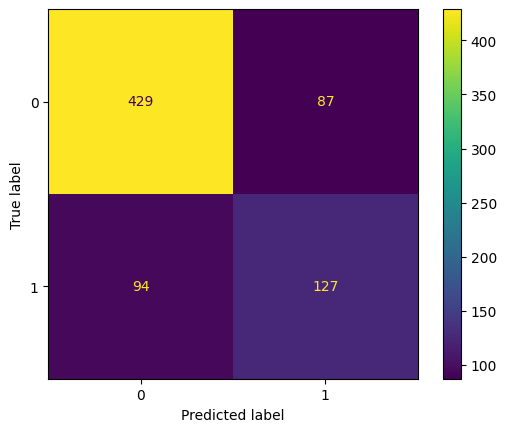

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_best = GradientBoostingClassifier(n_estimators = 150,
                                      subsample = 0.6,
                                      max_depth = 5,
                                      learning_rate = 0.1,
                                      ccp_alpha = 0,
                                      random_state=42)

gbc_best.fit(x_train, y_train)


from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = gbc_best.predict(x_test)

class_report = classification_report(y_test, y_pred, output_dict=True)

print(class_report)

from sklearn.metrics import accuracy_score

a = accuracy_score(y_test, y_pred)
print(f"Accuracy on data: {a}")

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

**Insights**:

The trained GBT model has a similar value for Recall as well as Precision

**Recomemndations:**

The trained Gradient Boosting strikes a balance between precision and recall and hence can be used equally in cases where False Negatives and False Positives are dangerous.

**Finding Feature Importances**

Feature Importances: [0.09996886 0.05626498 0.05951591 0.02064549 0.13363948 0.02447491
 0.08478262 0.14518043 0.20402427 0.17150305]


<Figure size 1000x600 with 0 Axes>

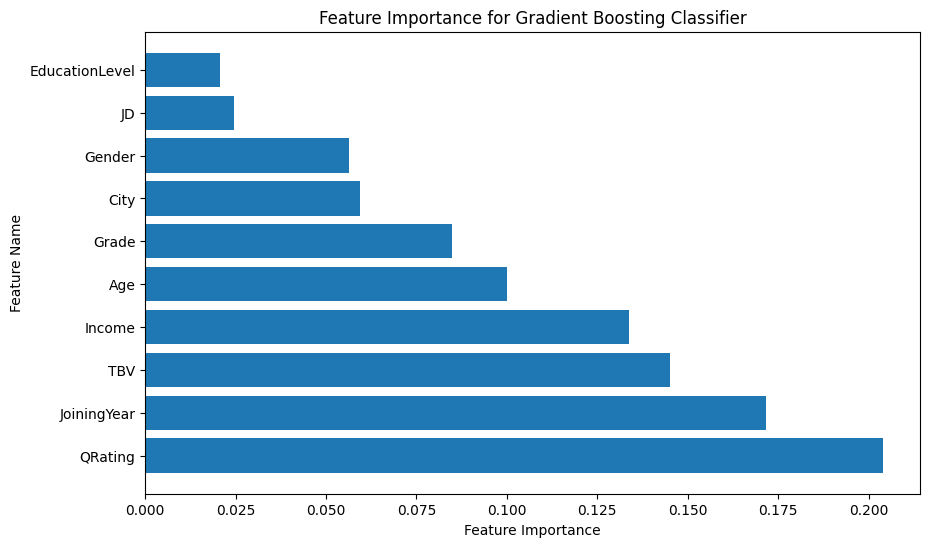

In [ ]:
feature_importances = gbc_best.feature_importances_

print("Feature Importances:", feature_importances)

feature_names = x.columns

plt.figure(figsize=(10, 6))

i = np.argsort(feature_importances)[::-1]

sorted_feature_names = feature_names[i]

sorted_importances = feature_importances[i]


plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance for Gradient Boosting Classifier")
plt.show()


**Insights**:

- Joining Year and Quarterly rating are the biggest indicators of an employee's tendency to churn.
- Job Designation and Education Level do not have that big of an effect on the employee's churning ability

**Recommendations**:

If the trained machine learning model is not available, the top 3 metrics to determine the employee's tendence to churn would be:

- Quarterly Rating
- Joining Year
- Employee's Sum of Total Business Value

**ROC Curve & Precision-Recall Curve**

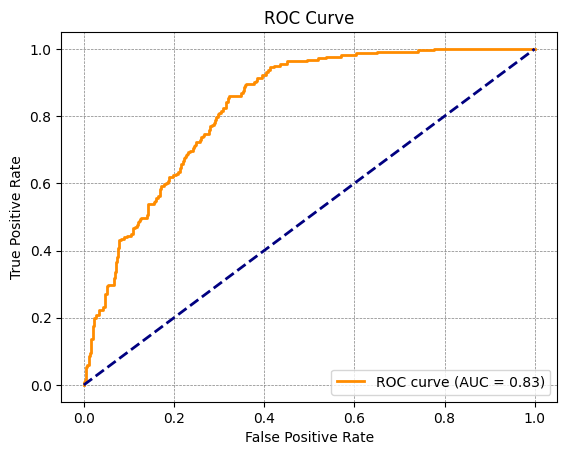

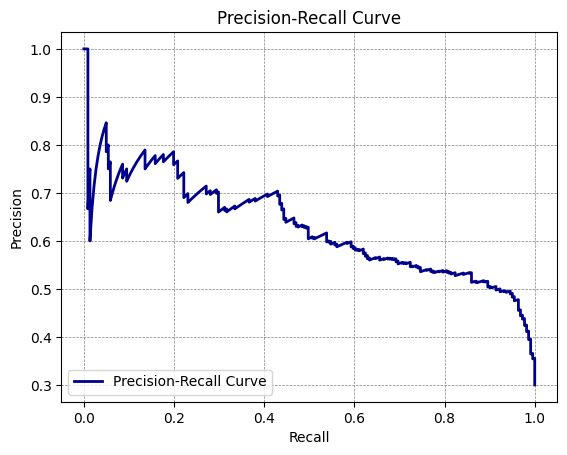

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = gbc_best.predict_proba(x_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='major')
plt.show()

from sklearn.metrics import precision_recall_curve

p, r, threshold = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(r, p, color='darkblue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both')
plt.show()

### LightGBM

**Making Training and Test Sets**

In [ ]:
from sklearn.model_selection import train_test_split

y = d['Staying']
x = d.drop(['Staying','JoiningDate','LastWorkingDate','DriverID','LastWorkingYear', 'MonthStayed'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=42)

**Searching for the Best Model and Training it**

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

gridParams = {
    'learning_rate': [0.1, 0.3, 0.5],
    'boosting_type' : ['gbdt'],
    'objective' : ['multiclass'],
    'max_depth' : [5,6,7,8],
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'metric':['multi_error'],
    }

lgbm = lgb.LGBMClassifier(num_classes=20)
random_cv = RandomizedSearchCV(lgbm,gridParams,verbose=3,cv=3,n_jobs = -1,n_iter=10)

random_cv.fit(x_train,y_train)

res = random_cv.cv_results_

print(random_cv.best_estimator_)

lgbest = random_cv.best_estimator_

lgbest.fit(x_train, y_train)

print("Model acc",lgbest.score(x_test, y_test))

**Results**

{'0': {'precision': 0.8223443223443223, 'recall': 0.8701550387596899, 'f1-score': 0.8455743879472694, 'support': 516.0}, '1': {'precision': 0.6492146596858639, 'recall': 0.5610859728506787, 'f1-score': 0.6019417475728155, 'support': 221.0}, 'accuracy': 0.7774762550881954, 'macro avg': {'precision': 0.7357794910150931, 'recall': 0.7156205058051843, 'f1-score': 0.7237580677600424, 'support': 737.0}, 'weighted avg': {'precision': 0.7704289146814738, 'recall': 0.7774762550881954, 'f1-score': 0.7725176531809812, 'support': 737.0}}


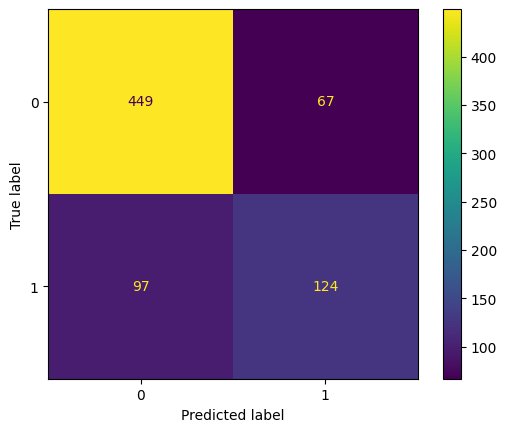

<Figure size 1000x600 with 0 Axes>

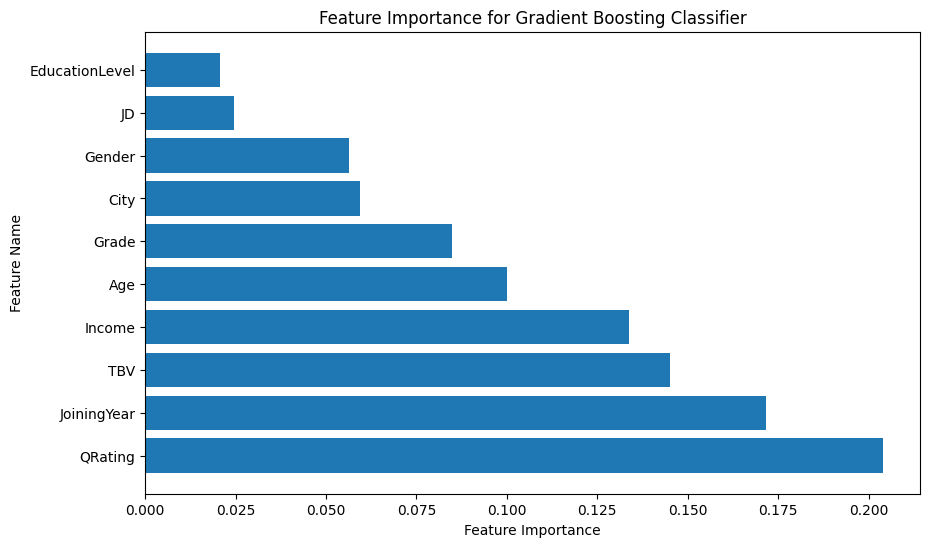

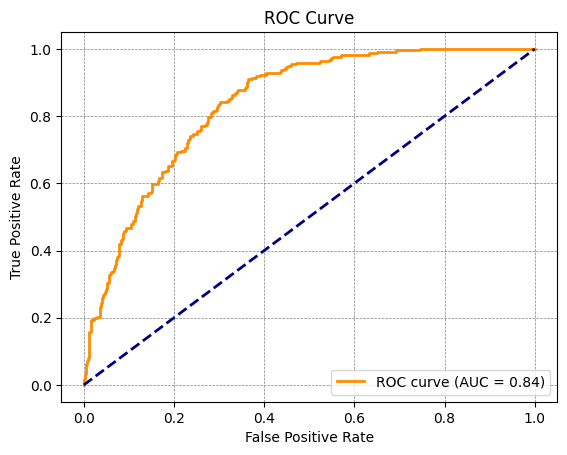

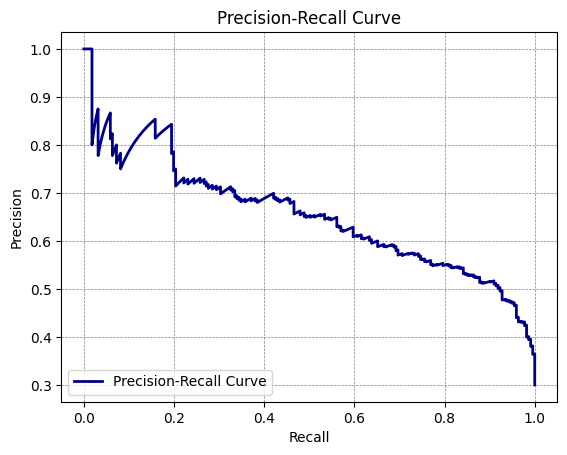

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = lgbest.predict(x_test)

class_report = classification_report(y_test, y_pred, output_dict=True)

print(class_report)

from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

feature_importances = gbc_best.feature_importances_

feature_names = x.columns

plt.figure(figsize=(10, 6))

i = np.argsort(feature_importances)[::-1]

sorted_feature_names = feature_names[i]

sorted_importances = feature_importances[i]


plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance for Gradient Boosting Classifier")
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

y_prob = lgbest.predict_proba(x_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='major')
plt.show()

from sklearn.metrics import precision_recall_curve

p, r, threshold = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(r, p, color='darkblue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both')
plt.show()

**Insights**:

- Joining Year and Quarterly rating are the biggest indicators of an employee's tendency to churn.
- Job Designation and Education Level do not have that big of an effect on the employee's churning ability
- The trained LightGBM has a higher value for Recall than Precision

**Recommendations**:

If the trained machine learning model is not available, the top 3 metrics to determine the employee's tendence to churn would be:

- Quarterly Rating
- Joining Year
- Employee's Sum of Total Business Value

The Trained Model can be used in places where False Negatives are harmful and need to be avoided